In [12]:
# Import necessary library
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')
path1= f'/content/drive/My Drive/IE434_Deep_Learning/Data_extraction/merged_pkl_data_file_original.pkl'
df = pd.read_pickle(path1)

Mounted at /content/drive


In [3]:
df

,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute
0,classic_bike,Mama Johnson Field - 4 St & Jackson St,South Waterfront Walkway - Sinatra Dr & 1 St,0.755607,0.747216,0.400846,0.304860,Customer,3,3,4,4,15,15,-0.033168
1,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,16,16,-0.037164
2,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,17,17,-0.021181
3,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,15,15,-0.029172
4,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,12,12,-0.013190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528299,electric_bike,Madison St & 1 St,Columbus Dr at Exchange Pl,0.665912,0.758533,0.311868,0.279800,Customer,9,9,4,4,21,22,-0.013190
1528300,classic_bike,Monmouth and 6th,Bergen Ave & Stegman St,0.394022,0.612992,0.266324,0.011277,member,9,9,6,6,17,18,-0.009194
1528301,electric_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,2,2,16,16,-0.041159
1528302,classic_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,1,1,11,11,-0.045155


In [4]:
# Group by start_day_of_week, start_hour, and end_station_name and calculate demand
grouped_df = df.groupby(['start_day_of_week', 'start_hour', 'end_station_name']).size().reset_index(name='demand')

# Merge the grouped information back to the original DataFrame based on the groupby columns
result_df = pd.merge(df, grouped_df, on=['start_day_of_week', 'start_hour', 'end_station_name'], how='left')


In [5]:
result_df

,rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute,demand
0,classic_bike,Mama Johnson Field - 4 St & Jackson St,South Waterfront Walkway - Sinatra Dr & 1 St,0.755607,0.747216,0.400846,0.304860,Customer,3,3,4,4,15,15,-0.033168,537
1,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,16,16,-0.037164,631
2,electric_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,17,17,-0.021181,565
3,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,6,6,15,15,-0.029172,605
4,classic_bike,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,member,3,3,4,4,12,12,-0.013190,414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521595,electric_bike,Madison St & 1 St,Columbus Dr at Exchange Pl,0.665912,0.758533,0.311868,0.279800,Customer,9,9,4,4,21,22,-0.013190,147
1521596,classic_bike,Monmouth and 6th,Bergen Ave & Stegman St,0.394022,0.612992,0.266324,0.011277,member,9,9,6,6,17,18,-0.009194,24
1521597,electric_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,2,2,16,16,-0.041159,147
1521598,classic_bike,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,member,9,9,1,1,11,11,-0.045155,82


In [6]:
#Perform one-hot encoding for each categorical column
df_one_hot = pd.get_dummies(result_df, columns=['rideable_type', 'member_casual' ])

In [7]:
# Assuming you have a DataFrame 'df' with the specified columns
columns_to_normalize = ['demand']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the specified columns
df_one_hot[columns_to_normalize] = scaler.fit_transform(df_one_hot[columns_to_normalize])

In [8]:
df_one_hot

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,start_month,stop_month,start_day_of_week,stop_day_of_week,start_hour,end_hour,tripduration_minute,demand,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,member_casual_Customer,member_casual_member
0,Mama Johnson Field - 4 St & Jackson St,South Waterfront Walkway - Sinatra Dr & 1 St,0.755607,0.747216,0.400846,0.304860,3,3,4,4,15,15,-0.033168,0.257321,1,0,0,1,0
1,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,4,4,16,16,-0.037164,0.302448,0,0,1,0,1
2,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,6,6,17,17,-0.021181,0.270763,0,0,1,0,1
3,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,6,6,15,15,-0.029172,0.289966,1,0,0,0,1
4,Baldwin at Montgomery,Grove St PATH,0.353913,0.378314,0.323884,0.228441,3,3,4,4,12,12,-0.013190,0.198272,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521595,Madison St & 1 St,Columbus Dr at Exchange Pl,0.665912,0.758533,0.311868,0.279800,9,9,4,4,21,22,-0.013190,0.070091,0,0,1,1,0
1521596,Monmouth and 6th,Bergen Ave & Stegman St,0.394022,0.612992,0.266324,0.011277,9,9,6,6,17,18,-0.009194,0.011042,1,0,0,0,1
1521597,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,9,9,2,2,16,16,-0.041159,0.070091,0,0,1,0,1
1521598,4 St & Grand St,Madison St & 10 St,0.737421,0.822512,0.458187,0.264579,9,9,1,1,11,11,-0.045155,0.038886,1,0,0,0,1


In [9]:
columns=['start_station_name',	'end_station_name', 'demand']
X = df_one_hot.drop(columns=columns)
Y = df_one_hot['demand']

In [10]:
# Assuming X is a DataFrame and Y is a numpy array
# Convert X to a numpy array
X = X.to_numpy()

# # Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert Y to a torch tensor
Y = torch.Tensor(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.numpy(), test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train_tn = torch.Tensor(X_train)
Y_train_tn = torch.Tensor(Y_train)
X_test_tn = torch.Tensor(X_test)
Y_test_tn = torch.Tensor(Y_test)

# Reshape the data for GRU input (assuming a time series structure)
X_train_tn = X_train_tn.view(X_train_tn.shape[0], 1, -1)
X_test_tn = X_test_tn.view(X_test_tn.shape[0], 1, -1)

# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

In [13]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tn, Y_train_tn)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test_tn, Y_test_tn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate the model, define loss and optimizer
input_size = X_train_tn.shape[2]
hidden_size = 50
output_size = 1
model = GRUModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
# Train the model
num_epochs = 10
train1_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)  # Reshape labels to match the output shape
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
    epoch_loss /= len(train_loader.dataset)
    train1_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test1_losses = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        labels = labels.view(-1, 1)
        test1_loss = criterion(outputs, labels)
        test1_losses.append(test1_loss.item() * inputs.size(0))
    test1_loss = sum(test1_losses) / len(test_loader.dataset)
    print(f'Mean Squared Error on Test Set: {test1_loss:.4f}')

Epoch [1/10], Loss: 0.0056
Epoch [2/10], Loss: 0.0081
Epoch [3/10], Loss: 0.0030
Epoch [4/10], Loss: 0.0025
Epoch [5/10], Loss: 0.0007
Epoch [6/10], Loss: 0.0008
Epoch [7/10], Loss: 0.0007
Epoch [8/10], Loss: 0.0014
Epoch [9/10], Loss: 0.0016
Epoch [10/10], Loss: 0.0005
Mean Squared Error on Test Set: 0.0014


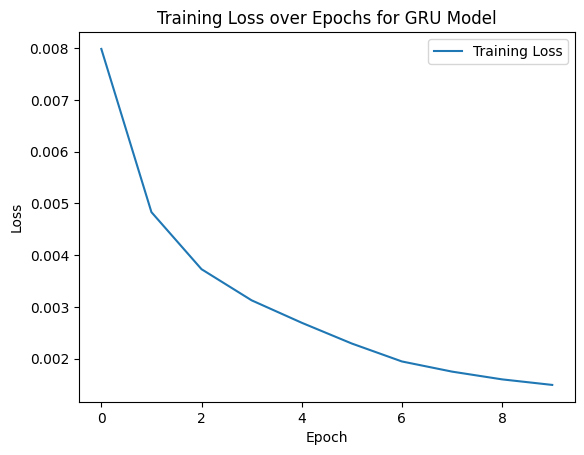

In [15]:
# Plotting the training loss curve
plt.plot(train1_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs for GRU Model')
plt.legend()
plt.show()

In [16]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.2 MB/s eta 0:00:00


In [60]:
# import shap

# # Assuming X_train_tn and X_test_tn are tensors
# # Create a SHAP explainer
# explainer = shap.Explainer(model, lambda x: model(x).detach().numpy())

# # Get SHAP values for the test set
# shap_values = explainer.shap_values(X_test_tn)

# # Summary plot
# shap.summary_plot(shap_values, X_test_tn, feature_names=df_one_hot.drop(columns='demand').columns)

# # Waterfall plot for a specific instance (adjust index accordingly)
# instance_idx = 0
# shap.waterfall_plot(shap.Explanation(values=shap_values[instance_idx],
#                                      base_values=explainer.expected_value,
#                                      data=X_test_tn[instance_idx],
#                                      feature_names=df_one_hot.drop(columns='demand').columns))


In [59]:
# import torch
# import torch.nn as nn
# from torch.autograd import grad

# # Assuming you have a trained GRU model called 'model'
# input_size =X_train_tn.shape[2] # Adjust based on your input size
# #gru_model = nn.GRU(input_size, hidden_size=50, batch_first=True)
# output_size = 1
# hidden_size=50
# #linear_layer = nn.Linear(50, output_size)  # If your GRU outputs a hidden state, you may need an additional linear layer
# model = GRUModel(input_size, hidden_size, output_size)


# # Assuming you have a single input sequence with shape (batch_size, sequence_length, input_size)
# # input_sequence = torch.randn(1, 10, input_size)
# # input_sequence.requires_grad = True
# X_train_tn = X_train_tn.view(X_train_tn.shape[0], 1, -1)
# # X_train.requires_grad = True

# # # Forward pass through the GRU
# # hidden_states, _ = gru_model(input_sequence)

# # # Extract the last hidden state and pass it through a linear layer
# # output = linear_layer(hidden_states[:, -1, :])

# # output = model(X_train)

# # # Dummy loss, replace it with your actual loss function
# # loss = torch.mean(output)

# # Compute gradients with respect to the input features
# # gradients = grad(loss, input_sequence)[0]
# inputs = inputs.requires_grad_()

# for inputs, labels in train_loader:
#     optimizer.zero_grad()
#     outputs = model(inputs)
#     labels = labels.view(-1, 1)  # Reshape labels to match the output shape
#     loss = criterion(outputs, labels)
#     loss.backward()

#     input_gradients = inputs.grad
#     label_gradients = labels.grad

#     optimizer.step()

# # Sum the gradients across the sequence dimension
# feature_importance = input_gradients.sum(dim=1).detach().numpy()

# # Print feature importance scores
# for i, importance in enumerate(feature_importance.squeeze()):
#     print(f"Feature {i + 1}: {importance}")


In [72]:
X = df_one_hot.drop(columns=columns)
Y = df_one_hot['demand']

# Split the data into training and testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model1 = LinearRegression()

# Fit the model to your training data
model1.fit(X_train1, Y_train1)


LinearRegression()

In [74]:
# Make predictions on the test data
Y_pred = model1.predict(X_test1)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)
mpe = np.mean((Y_test1 - Y_pred) / Y_test) * 100
print("Mean Percentage Error (MPE):", rmse)

Mean Absolute Error (MAE): 0.07505865070520087
Root Mean Square Error (RMSE): 0.11577125719681966
Mean Percentage Error (MPE): 0.11577125719681966


In [77]:
feature_weights = model1.coef_

# Sort feature weights in descending order
indices = feature_weights.argsort()[::-1]

# Sort indices and feature weights in descending order of feature importance
sorted_indices = sorted(range(len(indices)), key=lambda k: feature_weights[k], reverse=True)
sorted_feature_weights = [feature_weights[i] for i in sorted_indices]

# Print the feature names, their weights, and rank in descending order
for rank, index in enumerate(sorted_indices):
    print(f"Rank {rank + 1}: {X_train1.columns[index]} : {sorted_feature_weights[rank]}")

Rank 1: end_lng : 0.8471573956039891
Rank 2: start_lat : 0.027009764661260177
Rank 3: member_casual_member : 0.0045341548531796574
Rank 4: end_hour : 0.002035528124128154
Rank 5: rideable_type_classic_bike : 0.0018088129201581354
Rank 6: stop_day_of_week : 0.0011883416346306647
Rank 7: rideable_type_electric_bike : 0.0008314827805634868
Rank 8: stop_month : 0.0005206808500088228
Rank 9: start_month : -0.0007151188407709952
Rank 10: tripduration_minute : -0.0010775361407049779
Rank 11: start_hour : -0.0022935633074943652
Rank 12: rideable_type_docked_bike : -0.002640295700721454
Rank 13: start_day_of_week : -0.0031733774370082827
Rank 14: member_casual_Customer : -0.004534154853177073
Rank 15: start_lng : -0.06880580901285406
Rank 16: end_lat : -0.6807360669038712
